In [1]:
import numpy as np 
import pandas as pd
import missingno as msno #library for missing values
import matplotlib.pyplot as plt 

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [2]:
data = pd.read_csv("/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")

data_real = data[data['fraudulent'] == 0]
data_fake = data[data['fraudulent'] == 1]
print('In this dataset of ' + str(len(data)) + ' entries, ' + str(len(data_real)) + 
      ' are real jobs and ' + str(len(data_fake)) + ' of them are fraudulent jobs.')

In this dataset of 17880 entries, 17014 are real jobs and 866 of them are fraudulent jobs.


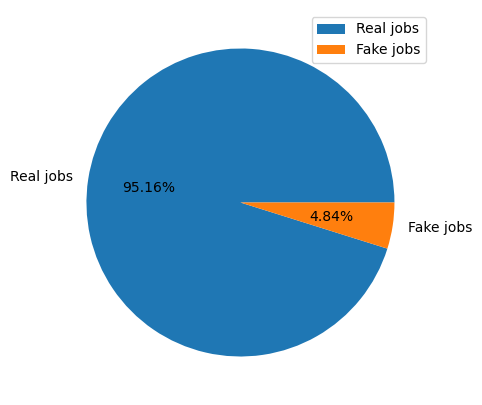

In [3]:
plt.figure(figsize= (5,5))
plt.pie([len(data_real), len(data_fake)], labels = ['Real jobs', 'Fake jobs'], autopct='%1.2f%%')
plt.legend(loc ="upper right")

# NULL VALUES

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

<AxesSubplot:>

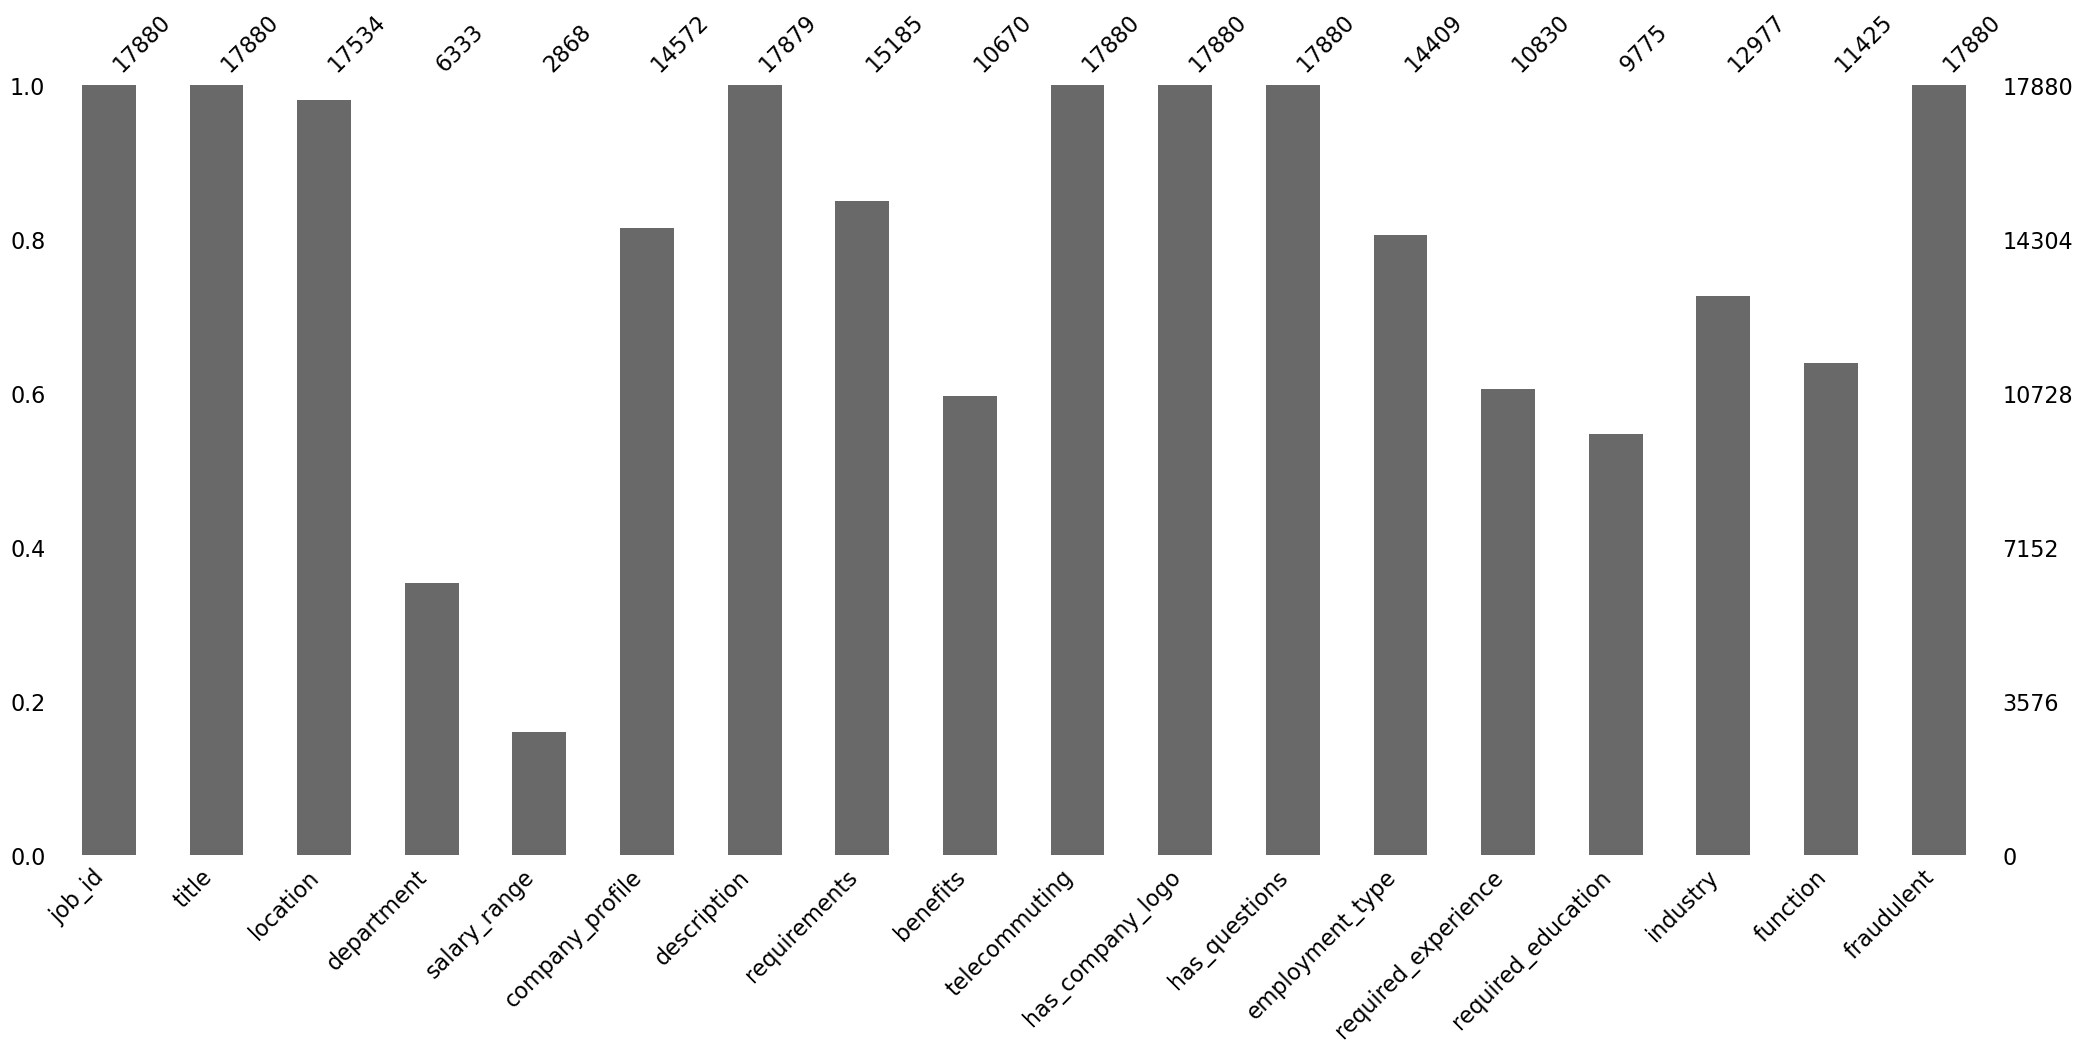

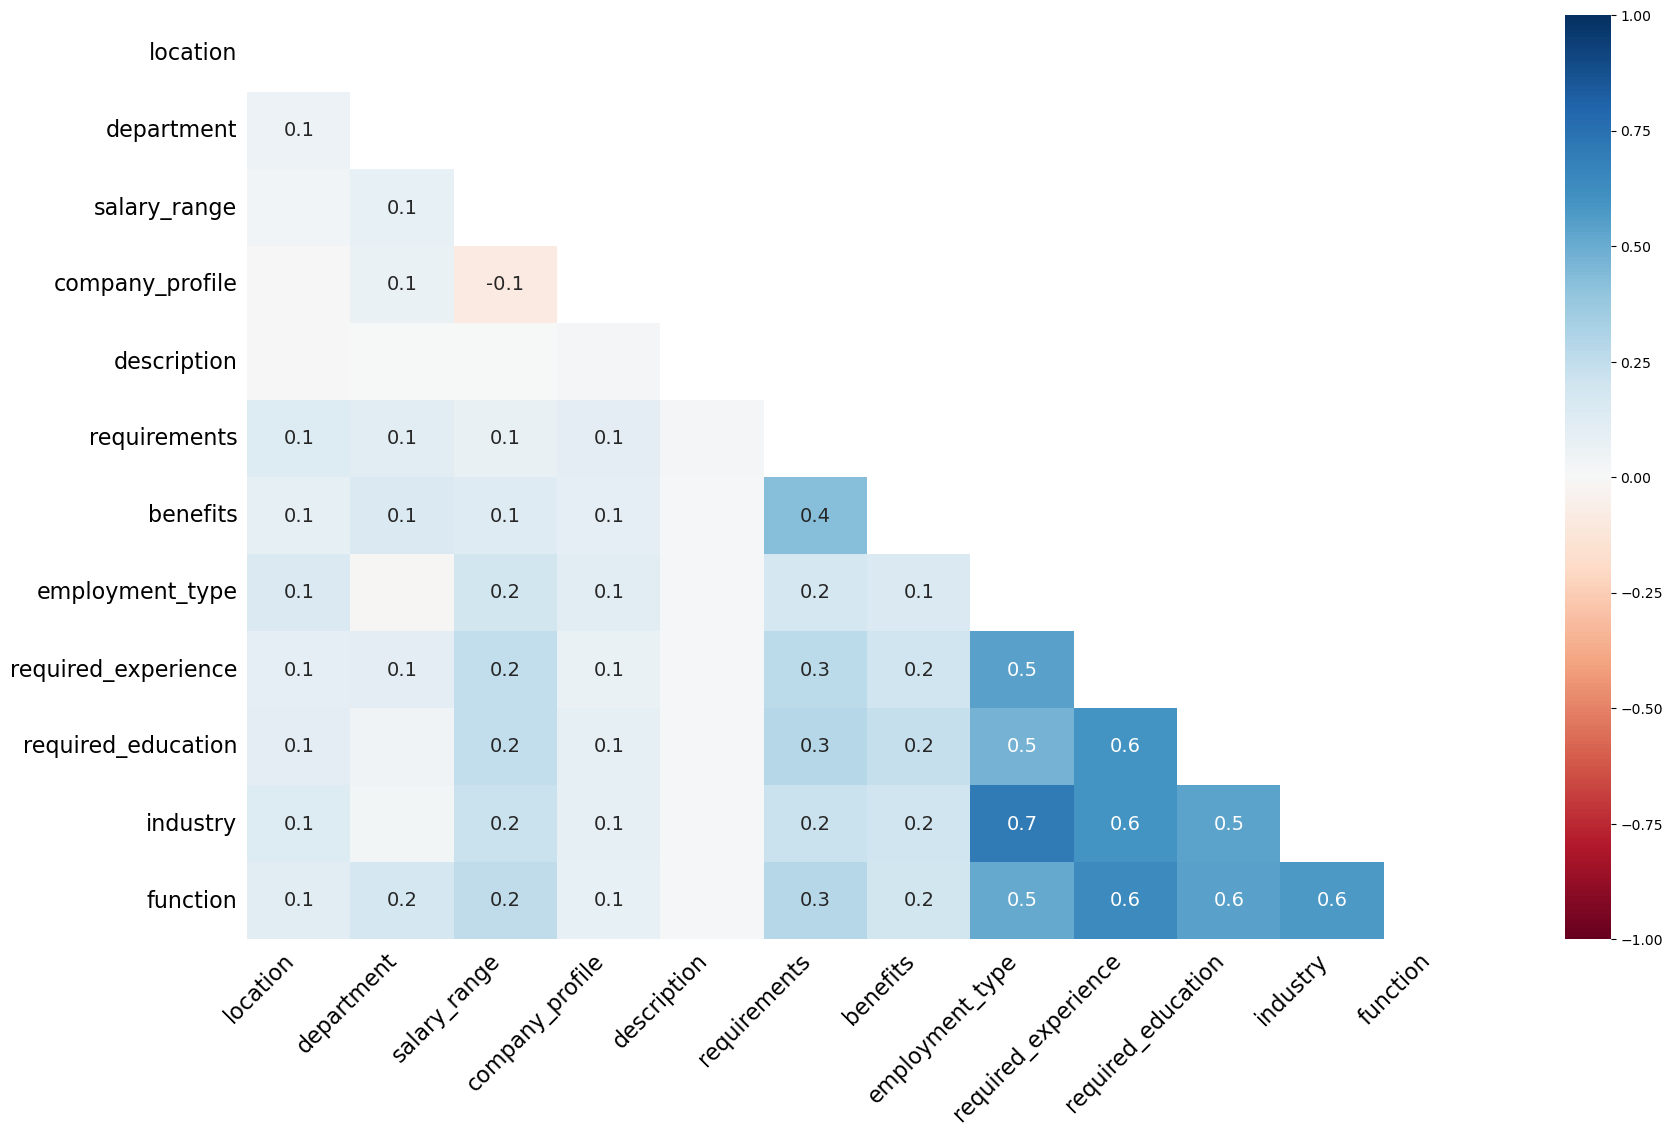

In [5]:
null_categories = ['location', 'department', 'salary_range', 'company_profile', 
                   'description','requirements', 'benefits', 'employment_type', 
                   'required_experience', 'required_education', 'industry', 'function']
msno.bar(data)
msno.heatmap(data)

In [6]:
data_real = data[data['fraudulent'] == 0]
data_fake = data[data['fraudulent'] == 1]
print('In this dataset of ' + str(len(data)) + ' entries, ' + str(len(data_real)) + 
      ' are real jobs and ' + str(len(data_fake)) + ' of them are fraudulent jobs.')

In this dataset of 17880 entries, 17014 are real jobs and 866 of them are fraudulent jobs.


There's a stronger correlation of missing values between the features: employment type, req experience, req education and industry. Considering, that fraudulent jobs are only 4.84% of the dataset, let's see how that changes when considering only fradulent jobs. 

<AxesSubplot:>

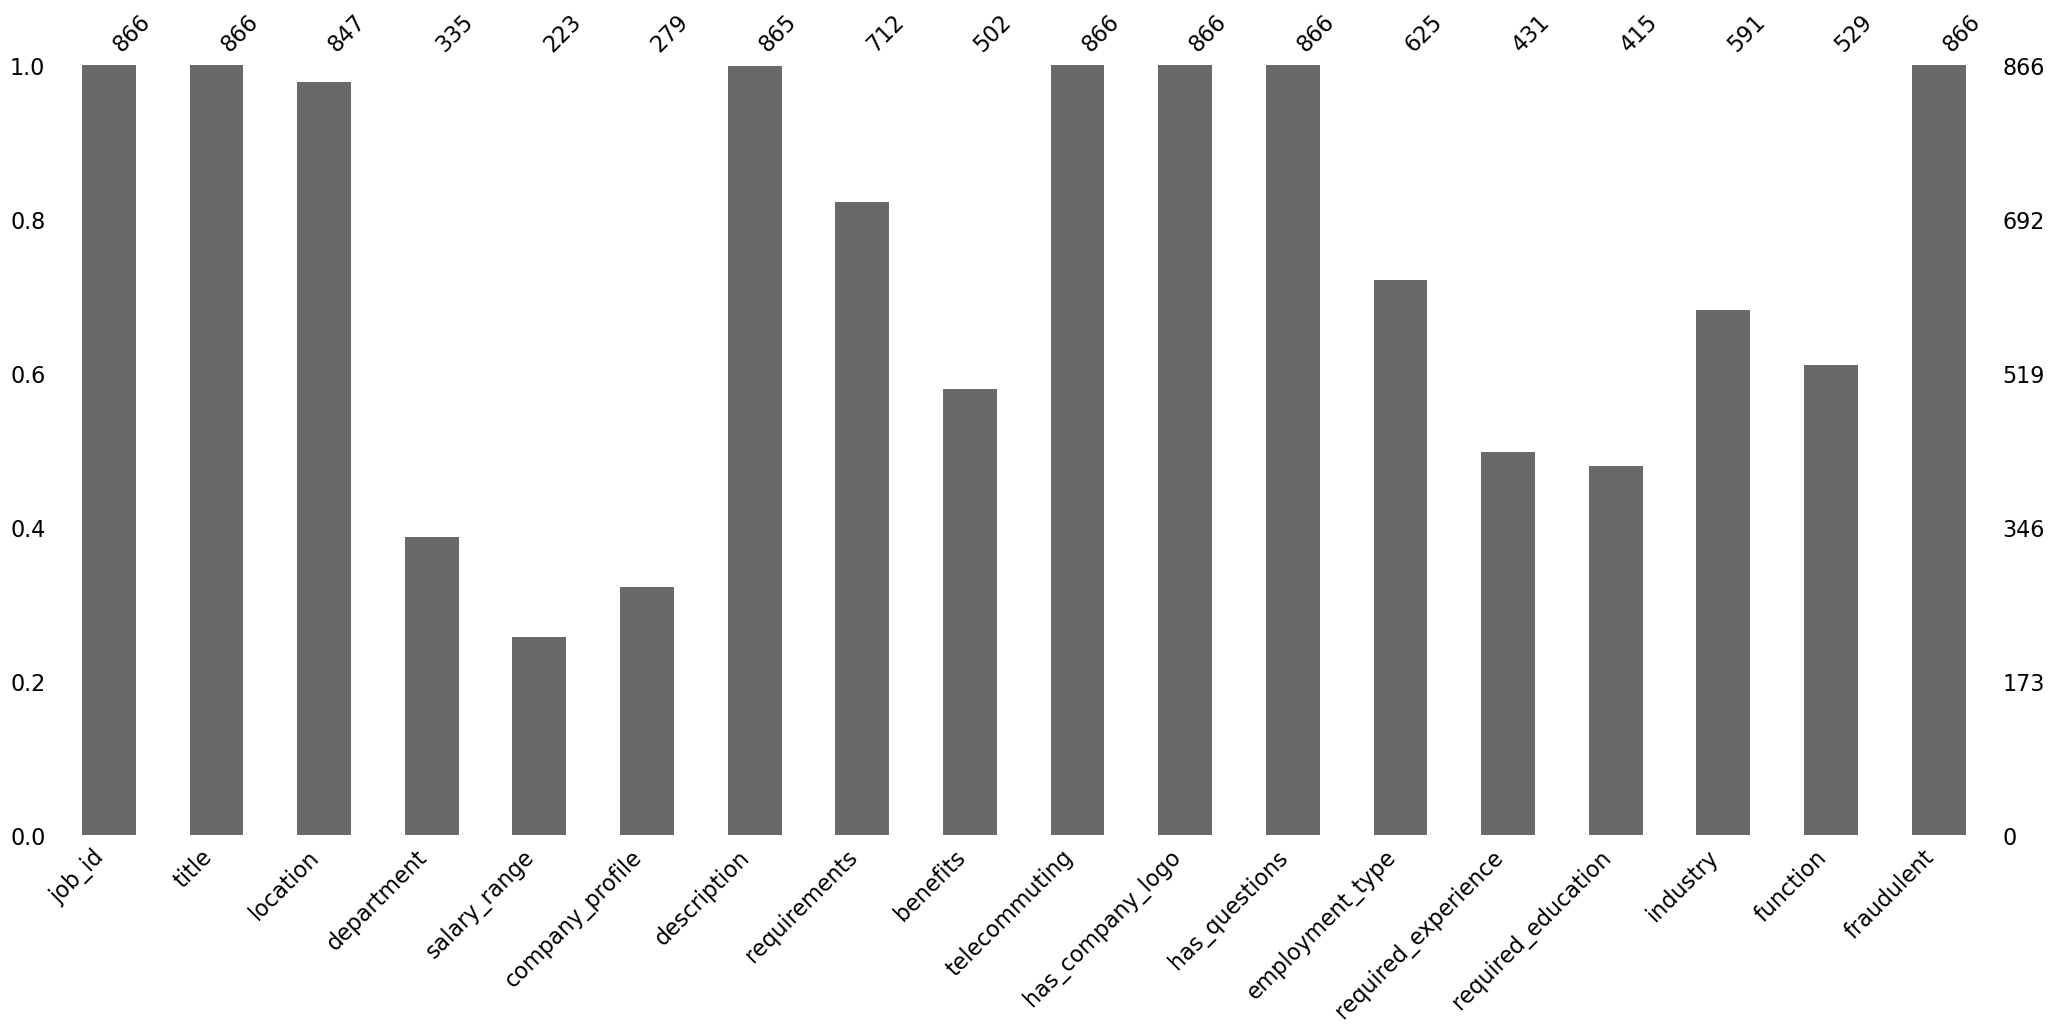

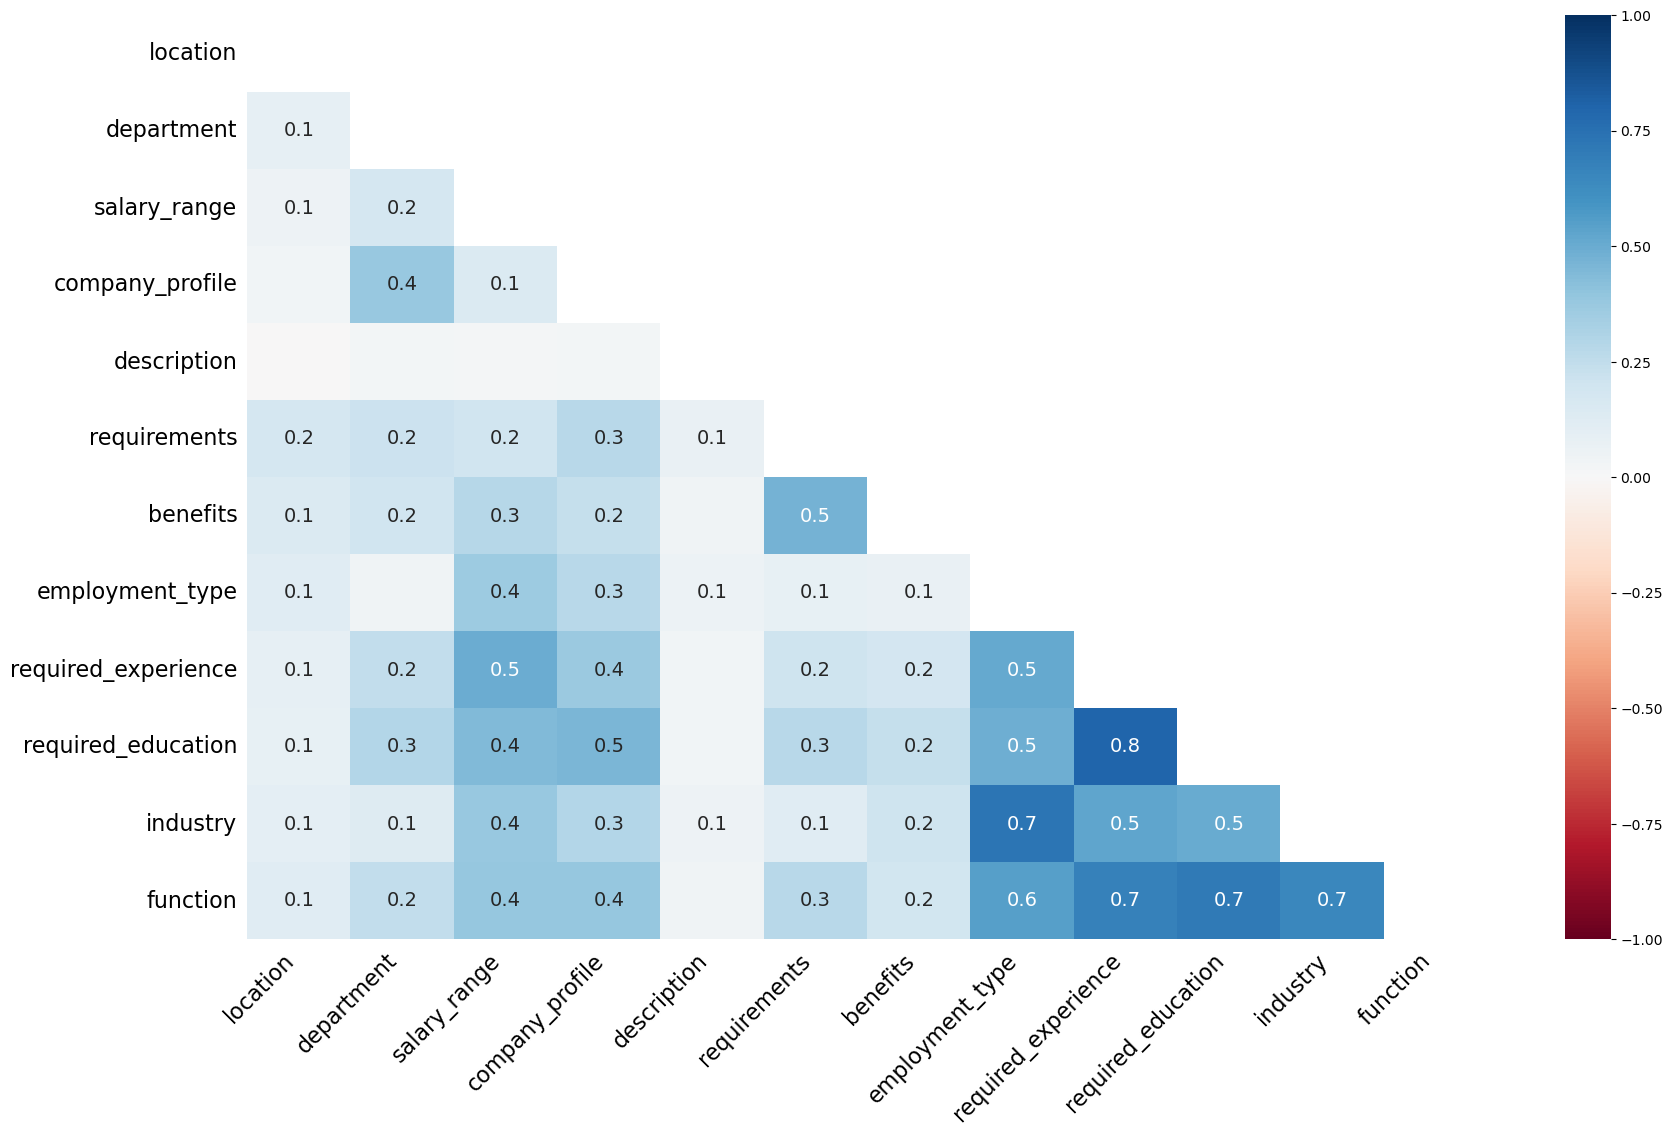

In [7]:
msno.bar(data_fake)
msno.heatmap(data_fake)

In [8]:
print('Category', '|', 'Fake Jobs', '|', ' Real Job')
for cat in null_categories:
    print(cat, '|', data_fake.isnull().mean()[cat], '|', data_real.isnull().mean()[cat], '|', data.isnull().mean()[cat])

Category | Fake Jobs |  Real Job
location | 0.021939953810623556 | 0.01921946632185259 | 0.01935123042505593
department | 0.6131639722863741 | 0.6474667920536029 | 0.6458053691275167
salary_range | 0.7424942263279446 | 0.8445397907605501 | 0.8395973154362416
company_profile | 0.6778290993071594 | 0.15992711884330552 | 0.18501118568232663
description | 0.0011547344110854503 | 0.0 | 5.592841163310962e-05
requirements | 0.17782909930715934 | 0.14934759609733161 | 0.15072706935123042
benefits | 0.42032332563510394 | 0.4023745151052075 | 0.40324384787472034
employment_type | 0.27829099307159355 | 0.18984365816386506 | 0.1941275167785235
required_experience | 0.5023094688221709 | 0.388797460914541 | 0.39429530201342283
required_education | 0.5207852193995381 | 0.449864817209357 | 0.4532997762863535
industry | 0.31755196304849886 | 0.27201128482426234 | 0.27421700223713646
function | 0.3891454965357968 | 0.3595862231103797 | 0.3610178970917226


In [9]:
print('From ' + str(len(data[data['company_profile'].isnull() == True])) + ' jobs that do not include company_profile, '
      + str(round(100*((len(data[(data['company_profile'].isnull() == True) & (data['fraudulent']==0)]))/(len(data[data['company_profile'].isnull() == True]))))) 
      + '% of them are fraudulent.')

From 3308 jobs that do not include company_profile, 82% of them are fraudulent.


We notice that when considering only fake jobs the correlation values are slightly higher, especially req experience and req education. However, we see that's not a big difference in the percentage of missing values between the dataset of fake jobs and the total dataset (95.5% consisting of non-fraudulent jobs). The only significant difference is noticed in the company_profile feature, where fake jobs tend to not include this feature in 68% of the cases, whereas, for real jobs there is only 16% missing values. Thus, there is a strong relation between not inluding this feature and the job being fraudulent.
As the analysis show a high percentage of missing values for the salary_range feature (74% and 84% for fake jobs and real jobs respectively) and the department feature (61% and 65% for fake jobs and real jobs respectively), I decided to drop these two features from the dataset. 

In [10]:
#Dropping the salary_range and department features
#data.drop(columns = ["salary_range", "department"], inplace = True)
data.drop(["salary_range", "department"], axis='columns', inplace = True)

In [11]:
data

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Plotting Attributes for Real VS Fake Jobs

In [12]:
print(data.nunique())

job_id                 17880
title                  11231
location                3105
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64


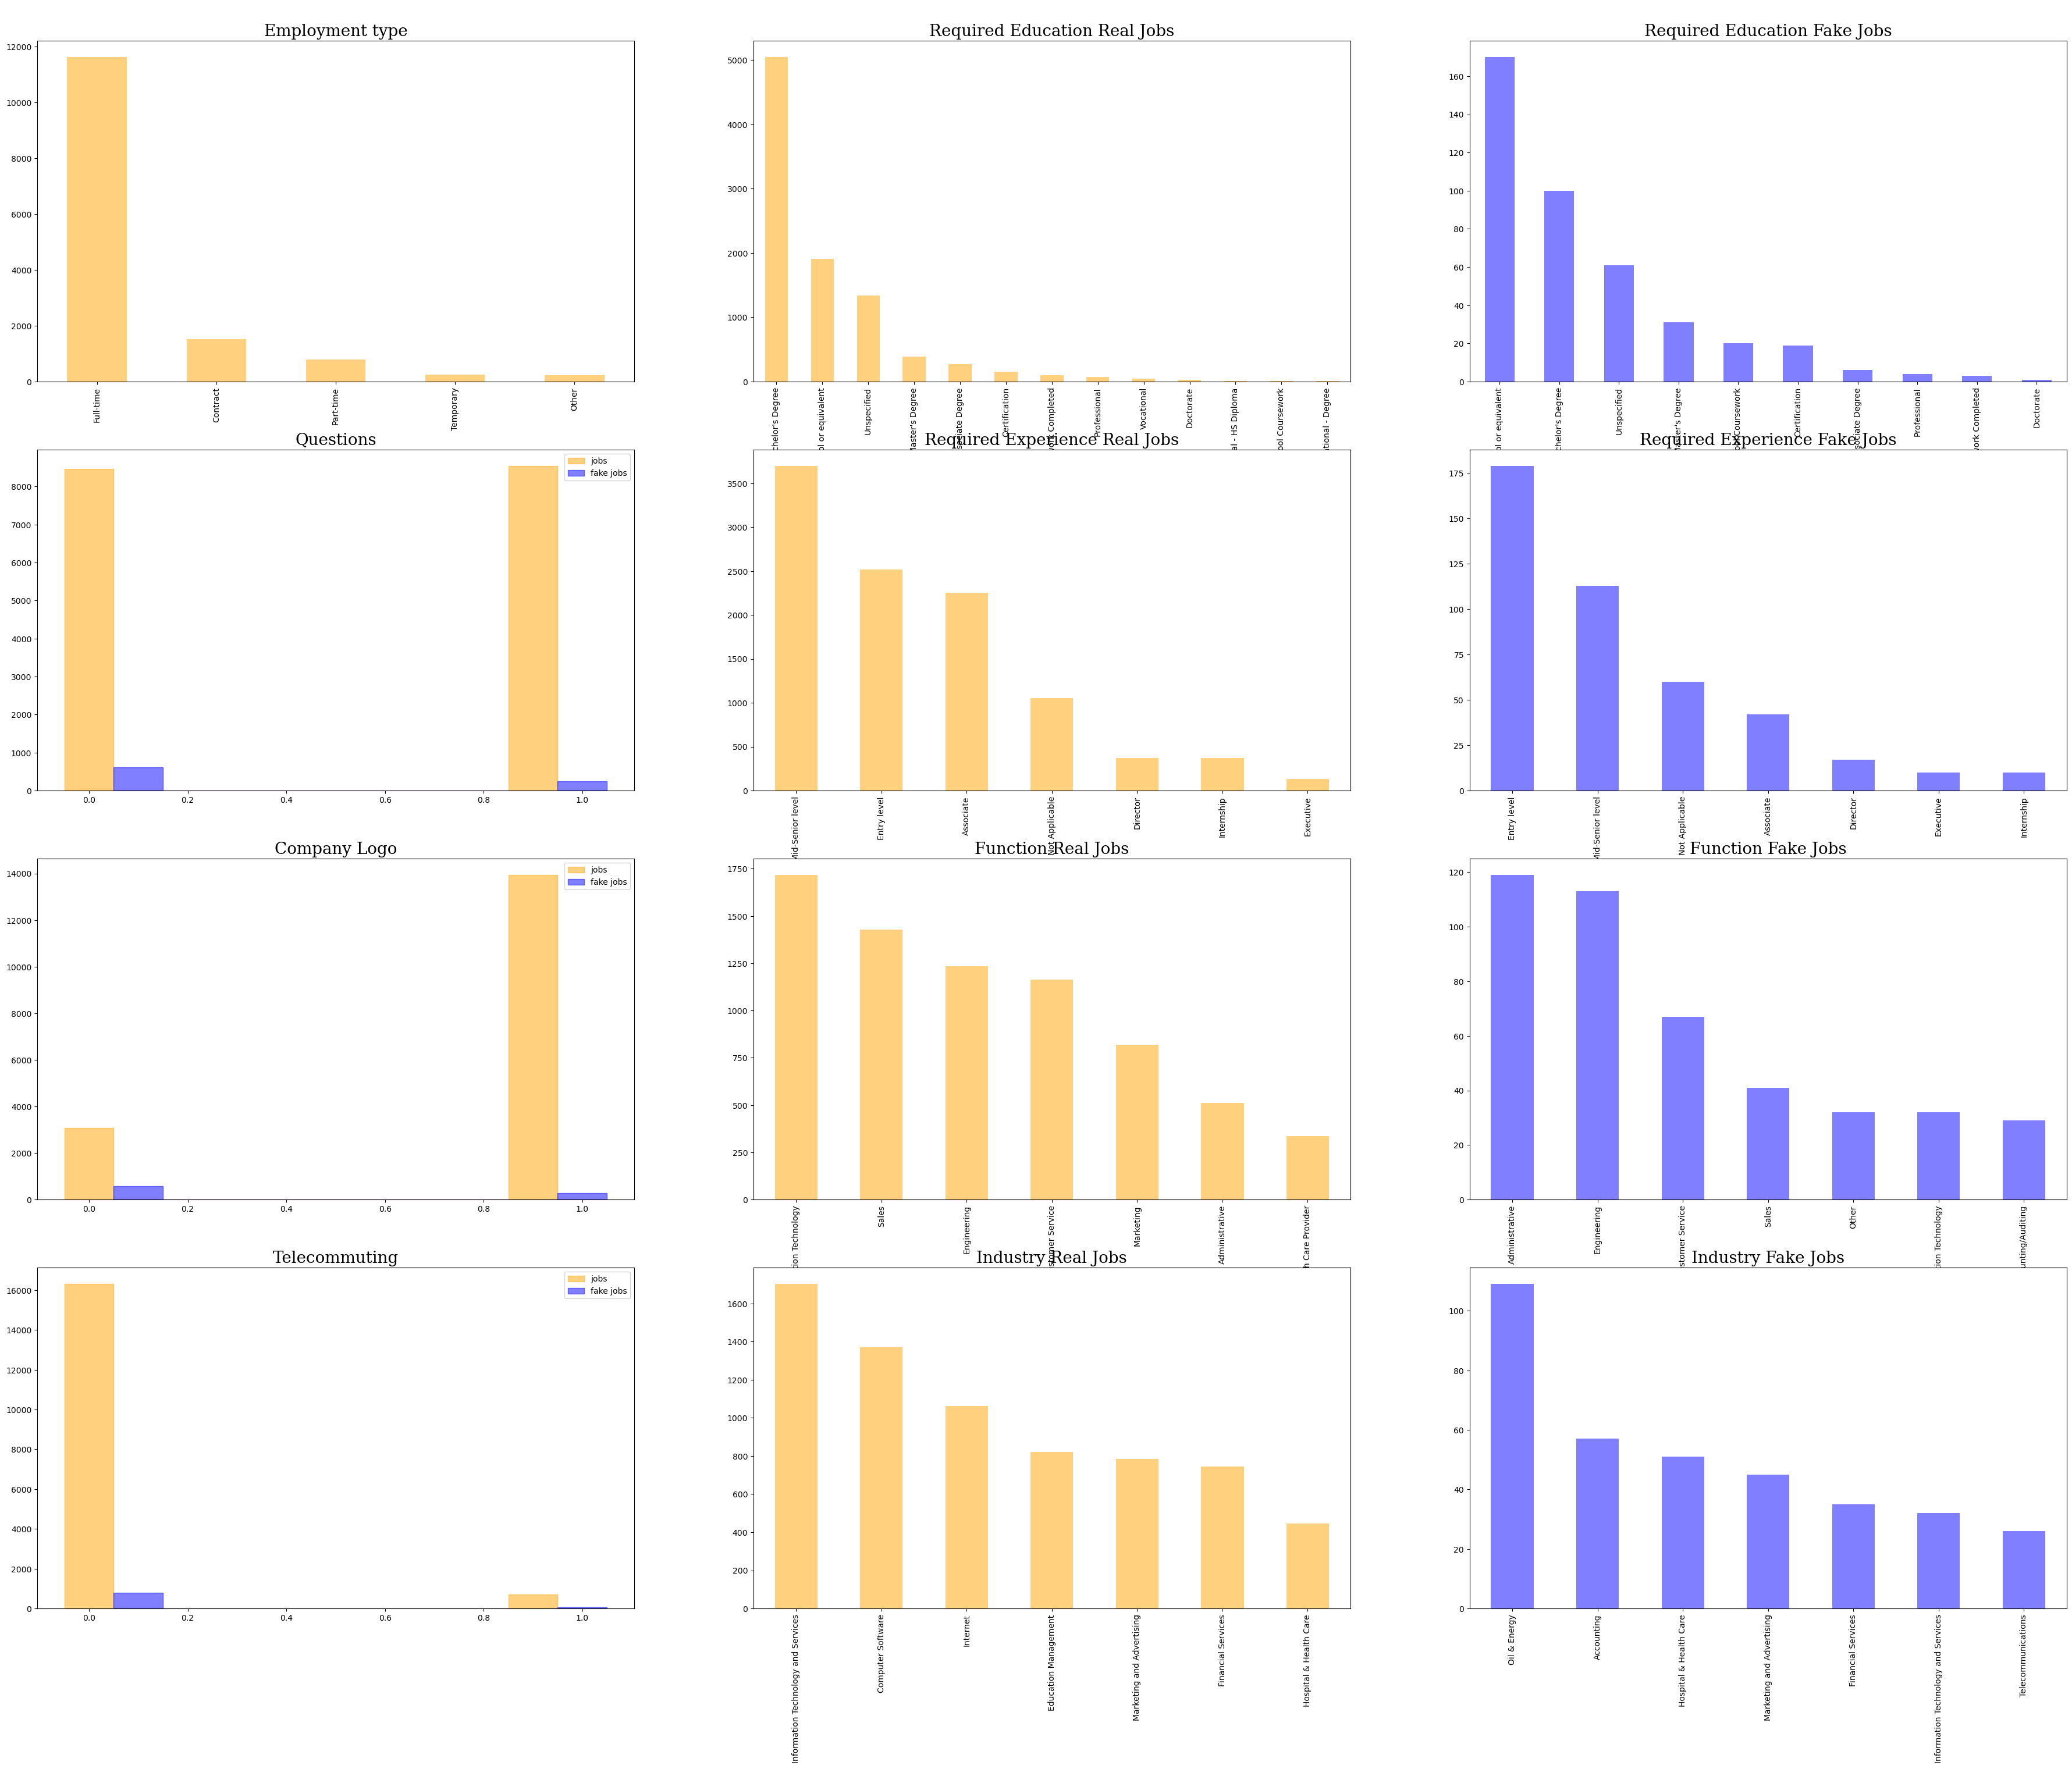

In [13]:
font = {'family':'serif','color':'black','size':20}
plt.figure(figsize= (45,35))

plt.subplot(4,3,1)
data['employment_type'].value_counts().plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\nEmployment type', fontdict = font)

plt.subplot(4,3,2)
data_real['required_education'].value_counts().plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\nRequired Education Real Jobs', fontdict = font)

plt.subplot(4,3,3)
data_fake['required_education'].value_counts().plot(kind='bar', color = 'blue',alpha = 0.5)
plt.title('\nRequired Education Fake Jobs', fontdict = font)

plt.subplot(4,3,4)
plt.hist(data_real['has_questions'], align = 'left', color='orange', edgecolor = 'orange', alpha = 0.5, label = 'jobs')
plt.hist(data_fake['has_questions'], align = 'right', color='blue', edgecolor = 'blue', alpha = 0.5, label='fake jobs')
plt.legend()
plt.title('\nQuestions', fontdict = font)

plt.subplot(4,3,5)
data_real['required_experience'].value_counts().plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\nRequired Experience Real Jobs', fontdict = font)

plt.subplot(4,3,6)
data_fake['required_experience'].value_counts().plot(kind='bar', color = 'blue',alpha = 0.5)
plt.title('\nRequired Experience Fake Jobs', fontdict = font)

plt.subplot(4,3,7)
plt.hist(data_real['has_company_logo'], align = 'left', color='orange', edgecolor = 'orange', alpha = 0.5, label = 'jobs')
plt.hist(data_fake['has_company_logo'], align = 'right', color='blue', edgecolor = 'blue', alpha = 0.5, label='fake jobs')
plt.legend()
plt.title('\nCompany Logo', fontdict = font)

plt.subplot(4,3,8)
data_real['function'].value_counts(dropna=True)[:7].plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\nFunction Real Jobs', fontdict = font)

plt.subplot(4,3,9)
data_fake['function'].value_counts(dropna=True)[:7].plot(kind='bar', color = 'blue',alpha = 0.5)
plt.title('\nFunction Fake Jobs', fontdict = font)

plt.subplot(4,3,10)
plt.hist(data_real['telecommuting'], align = 'left', color='orange', edgecolor = 'orange', alpha = 0.5, label = 'jobs')
plt.hist(data_fake['telecommuting'], align = 'right', color='blue', edgecolor = 'blue', alpha = 0.5, label='fake jobs')
plt.legend()
plt.title('\nTelecommuting', fontdict = font)

plt.subplot(4,3,11)
data_real['industry'].value_counts(dropna=True)[:7].plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\nIndustry Real Jobs', fontdict = font)

plt.subplot(4,3,12)
data_fake['industry'].value_counts(dropna=True)[:7].plot(kind='bar', color = 'blue',alpha = 0.5)
plt.title('Industry Fake Jobs', fontdict = font)

plt.show()

# LOCATION

In [14]:
#function to  get the country where the job is posted 
def country(text):
    if type(text) != float: #location is not null
        return text.split(',')[0]
    else:
        return ' '

#adding a column to the original dataset with the country where the job is posted    
data['country'] = data.location.apply(country)

#creating another dataframe with the number of jobs per each country
country_df = data.location.apply(country).value_counts().to_frame()
country_df = country_df.rename(columns={'location': 'no of jobs'})
country_df['no of real jobs'] = data_real.location.apply(country).value_counts().to_frame()
country_df['no of fake jobs'] = data_fake.location.apply(country).value_counts().to_frame()
country_df.head(5)

,no of jobs,no of real jobs,no of fake jobs
US,10656,9926,730.0
GB,2384,2361,23.0
GR,940,940,NaN
CA,457,445,12.0
DE,383,383,NaN


## Because 85% of the fake jobs in the dataset are located in the US, and to ensure that all the textual categories are only in English, I will only use for further analysis and predictions jobs posted in the US. 

Text(0.5, 1.0, '\n Fake jobs per state')

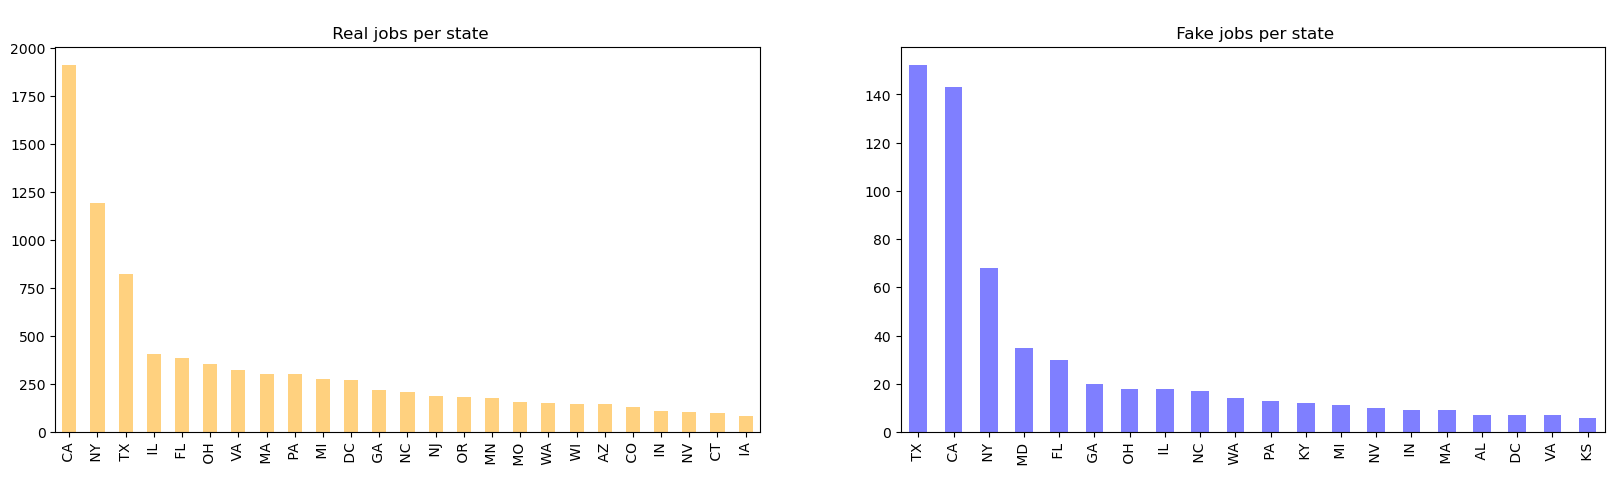

In [15]:
# Creating a new dataset with jobs posted only in the US
data_US = data[data["country"] == 'US']
data_US = data_US.reset_index()
data_US.drop('index', axis = 'columns', inplace = True)

#Adding a column that indicates the state where the job was posted
def state(text):
    if len(text) > 3:
        return text.split(',')[1]
    else:
        return ' '    
data_US['state'] = data_US.location.apply(state)

#Creating two seperate datasets for real jobs and fake jobs in the US
data_US_real = data_US[data_US['fraudulent'] == 0]
data_US_fake = data_US[data_US['fraudulent'] == 1]

#Plotting the number of real jobs and fake jobs per state
#To keep the figures as clear as possible, only the 20 states with the most jobs are plotted and fake and real jobs are plotted in different subplots.
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
data_US_real[data_US_real['state'] != ' '].state.value_counts()[:25].plot(kind='bar', color = 'orange',alpha = 0.5)
plt.title('\n Real jobs per state')
plt.subplot(1,2,2)
data_US_fake[data_US_fake['state'] != ' '].state.value_counts()[:20].plot(kind='bar', color = 'blue',alpha = 0.5)
plt.title('\n Fake jobs per state')

Text(0.5, 1.0, '\n Percentage of fake jobs per state')

<Figure size 2000x500 with 0 Axes>

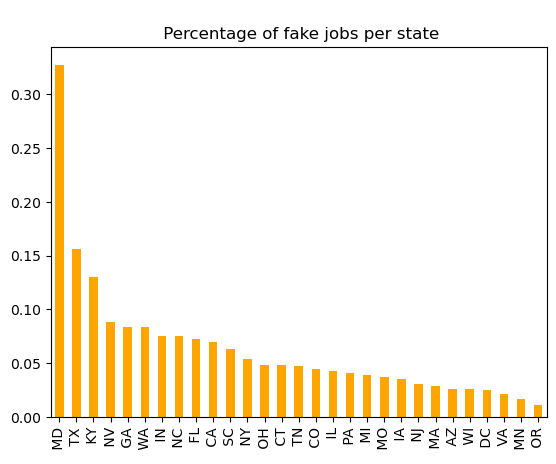

In [16]:
# Creating a new attribute, for each state we calculate the pecentage of fake jobs
state_df = data_US.state.value_counts().to_frame().rename(columns = {'state' : 'no of jobs'})
state_df['no of fake jobs'] = data_US_fake.state.value_counts()
state_df['p_fake_jobs'] = (state_df['no of fake jobs'] / state_df['no of jobs'])
#I only visualize the top 20 to not include states with a very small number of total jobs
#Using state_df1 only to plot
state_df1 = state_df[:30]
state_df1 = state_df1.drop(columns = ['no of fake jobs', 'no of jobs'])
state_df1.drop(' ', axis = 'index', inplace = True)
state_df1.sort_values('p_fake_jobs',ascending=False, inplace = True)

plt.figure(figsize = (20,5))
state_df1.plot.bar(legend = None, color = 'orange')
plt.title('\n Percentage of fake jobs per state')

In [17]:
#adding a new column to the US dataset, a percentage of fake jobs 
state_df.drop(' ', axis = 'index', inplace = True)
states_percentage = state_df['p_fake_jobs'].to_dict()
data_US['percentage of fake jobs'] = data_US['state'].map(states_percentage)

# Wordclouds

In [21]:
#Creating a column with all the textual data
data_US_text = data_US[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits',
                        'employment_type', 'required_experience','required_education', 'industry', 'function', 'fraudulent']]
data_US_text = data_US_text.fillna(' ')
data_US_text['text'] = data_US_text['title'] + ' ' + data_US_text['location'] + ' ' + data_US_text['company_profile'] + ' '+ data_US_text['description'] + ' '+ data_US_text['requirements'] + ' '+ data_US_text['benefits'] + ' '+ data_US_text['employment_type'] + ' '+ data_US_text['required_experience'] + ' ' + data_US_text['required_education'] + ' '+ data_US_text['industry'] + ' ' + data_US_text['function']
data_US_text.drop(columns = ['title', 'location', 'company_profile', 'description', 'requirements', 'benefits',
                        'employment_type', 'required_experience','required_education', 'industry', 'function' ], inplace = True)

data_US_text_real = data_US_text[data_US_text['fraudulent'] == 0]
data_US_text_fake = data_US_text[data_US_text['fraudulent'] == 1]

In [22]:
text = " ".join(i for i in data_US_text_real.text)
text1 = " ".join(i for i in data_US_text_fake.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

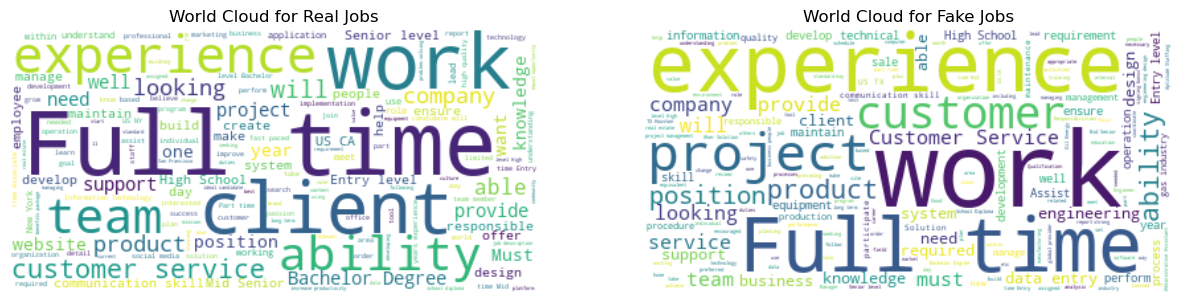

In [24]:
plt.figure( figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("World Cloud for Real Jobs")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title("World Cloud for Fake Jobs")
plt.axis("off")

plt.show()

In [25]:
data_US_text

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Commissioning Machinery Assistant (CMA) US, IA..."
2,0,"Account Executive - Washington DC US, DC, Wash..."
3,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."
4,0,"Accounting Clerk US, MD, Job OverviewApex i..."
...,...,...
10651,0,"Product Manager US, CA, San Francisco Flite de..."
10652,0,"Recruiting Coordinator US, NC, Charlotte RES..."
10653,0,"JavaScript Developer US, , Sr, JavaScript D..."
10654,0,"Payroll Accountant US, PA, Philadelphia WebLin..."
